In [1]:
import random

# 记录保持原来选择和切换选择的获胜次数
num_simulations = 100000
stay_wins = 0
switch_wins = 0

for _ in range(num_simulations):
    # 随机设置奖品的位置（0, 1, 2）
    prize_door = random.randint(0, 2)
    # 参与者随机选择一扇门
    player_choice = random.randint(0, 2)

    # 主持人打开一扇门，展示山羊
    # 主持人不能打开有奖品的门，也不能打开玩家选择的门
    # 可选择的门是从剩下的两扇门中排除有奖品的门
    doors = [0, 1, 2]
    doors.remove(prize_door)
    if player_choice in doors:
        doors.remove(player_choice)
    # 主持人随机选择一扇门打开
    opened_door = random.choice(doors)

    # 切换选择的门
    # 从剩下的两扇门中排除打开的和玩家原来的选择
    doors = [0, 1, 2]
    doors.remove(opened_door)
    doors.remove(player_choice)
    switch_choice = doors[0]

    # 判断是否获胜
    if player_choice == prize_door:
        stay_wins += 1
    if switch_choice == prize_door:
        switch_wins += 1

# 输出结果
print(f"模拟次数: {num_simulations}")
print(f"保持选择获胜的次数: {stay_wins}, 胜率: {stay_wins / num_simulations:.2%}")
print(f"切换选择获胜的次数: {switch_wins}, 胜率: {switch_wins / num_simulations:.2%}")

模拟次数: 100000
保持选择获胜的次数: 33614, 胜率: 33.61%
切换选择获胜的次数: 66386, 胜率: 66.39%


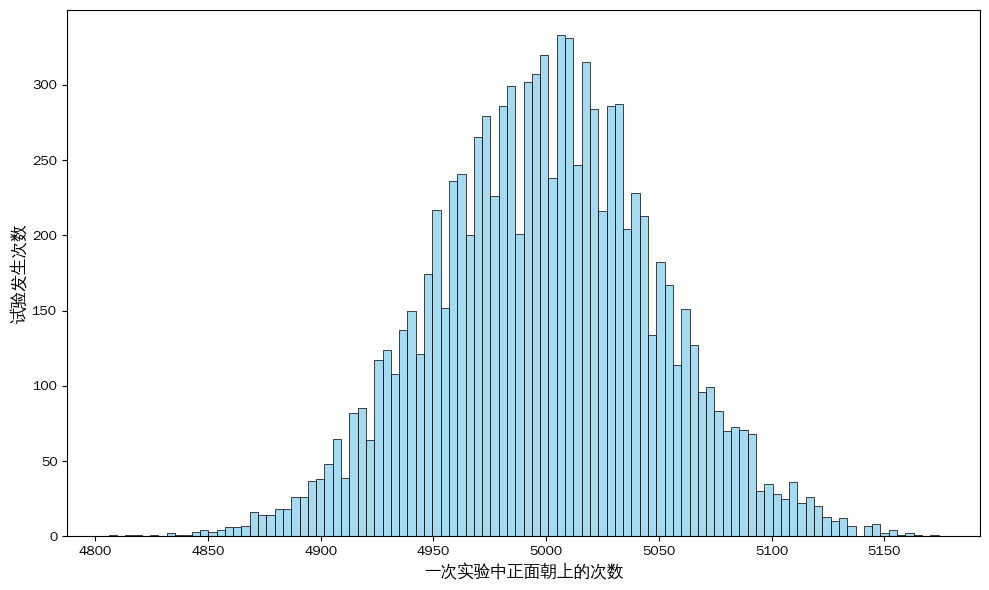

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm

mpl.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
mpl.rcParams['axes.unicode_minus'] = False

# 设置随机种子（确保结果可复现）
# np.random.seed(42)

# 参数设置
n_trials = 10000  # 试验次数（10,000次）
n_flips = 10000   # 每次试验抛硬币次数（10,000次）
p = 0.5           # 硬币公平，正面概率0.5

# 模拟试验：生成10,000次试验，每次试验抛10,000次硬币，记录正面次数
heads_count = np.random.binomial(n_flips, p, n_trials)

# 绘制直方图 + 理论正态分布曲线
plt.figure(figsize=(10, 6))
sns.histplot(heads_count, bins=100, kde=False, color="skyblue", label="试验结果")
plt.xlabel("一次实验中正面朝上的次数", fontsize=12)
plt.ylabel("试验发生次数", fontsize=12)
plt.tight_layout()
# plt.savefig('coin_flip_simulation.svg', format='svg')
plt.show()

100%|██████████| 100000/100000 [00:07<00:00, 12810.81it/s]


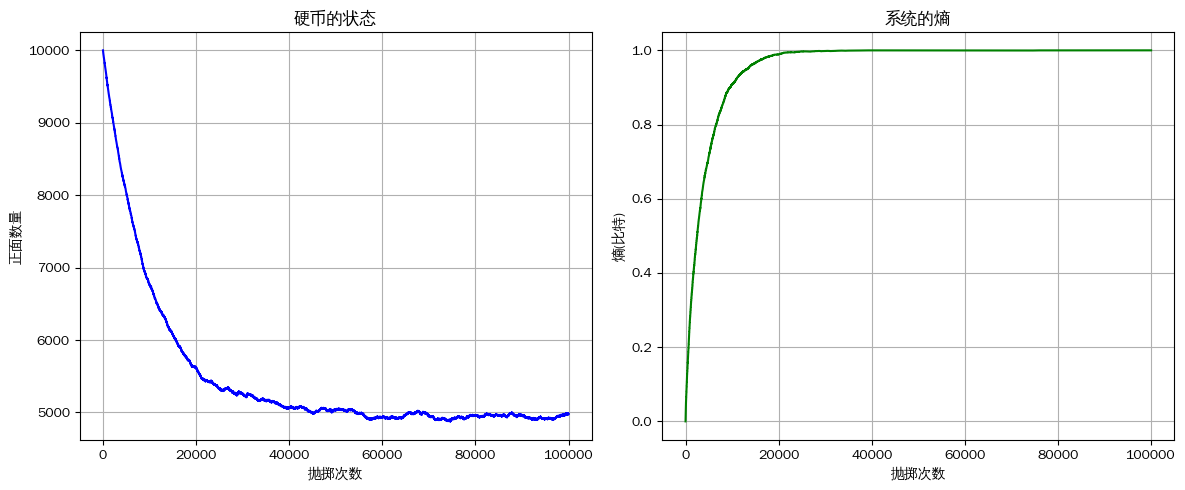

In [3]:
import random
import matplotlib.pyplot as plt
from math import log2
from tqdm import tqdm

# 初始化
coin_count = 10000
throw_count = 100000
coins = [1] * coin_count  # 初始全部正面朝上
heads_count = []       # 记录正面向上的数量
entropy_list = []      # 记录熵

for _ in tqdm(range(throw_count)):
    # 随机选择一枚硬币
    idx = random.randint(0, coin_count - 1)

    # 抛掷（50% 概率翻转）
    if random.random() < 0.5:
        coins[idx] = 1 - coins[idx]

    # 统计当前正面向上的数量
    current_heads = sum(coins)
    heads_count.append(current_heads)

    # 计算熵（以正反面概率计算）
    p_heads = current_heads / coin_count
    p_tails = 1 - p_heads
    if p_heads == 0 or p_tails == 0:
        current_entropy = 0  # 确定性状态（熵为0）
    else:
        current_entropy = - (p_heads * log2(p_heads) + p_tails * log2(p_tails))
    entropy_list.append(current_entropy)

# 绘制结果
plt.figure(figsize=(12, 5))

# 1. 正面向上的数量
plt.subplot(1, 2, 1)
plt.plot(heads_count, color='blue')
plt.title('硬币的状态')
plt.xlabel('抛掷次数')
plt.ylabel('正面数量')
plt.grid(True)

# 3. 熵
plt.subplot(1, 2, 2)
plt.plot(entropy_list, color='green')
plt.title('系统的熵')
plt.xlabel('抛掷次数')
plt.ylabel('熵(比特)')
plt.grid(True)

plt.tight_layout()
# plt.savefig('entropy.svg', format='svg')
plt.show()